# Visualizing Time Series

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]

The previous two lectures we discussed scatterplots, where we plot one quantitative variable against another. A special case arises when one of the two variables can be thought of as time, because time imposes additional structure on the data. Now the data points have an **inherent order**; we can arrange the points in order of increasing time and define a predecessor and successor for each data point. We frequently want to visualize this temporal order.

Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like **trends, cycles, and seasonality** that can influence the choice of model.



Let's look at the timeseries of minimum daily temperature of Melbourne, Australia

In [283]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, squeeze=False)
series.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Discussion
Look at Data type. What is the data type of Date column?

In [284]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [285]:
# Convert the date column to a datestamp type
series['Date'] = pd.to_datetime(series.Date)

In [286]:
series.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

Let's make a scatter plot

## Excercise: 
Let's make a scatter plot of temp vs. Dates

In [287]:
# Set the date column as the index of your DataFrame 
series = series.set_index('Date')

In [288]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [289]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [290]:
series_1 = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)

In [291]:
series_1.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Figure size 1440x720 with 0 Axes>

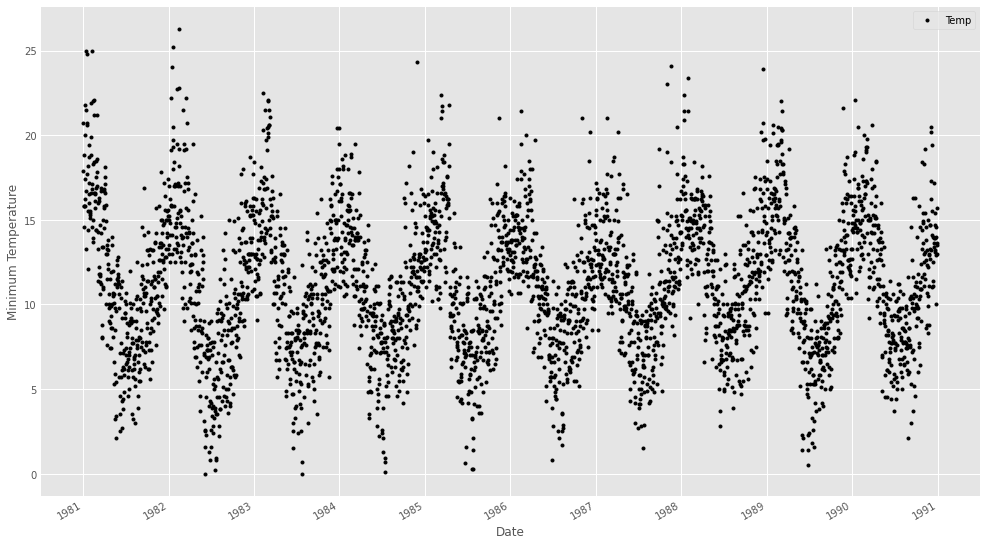

In [292]:
plt.figure (figsize= (20,10))
ax = series.plot(style='k.')
# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

## Crating Line Plot
Using lines to represent time series-  **Line Plots** - is generally accepted practice, however, and frequently the dots are omitted altogether . Without dots, the figure places more emphasis on the overall trend in the data and less on individual observations. A figure without dots is also visually less busy. In general, the denser the time series, the less important it is to show individual observations with dots.

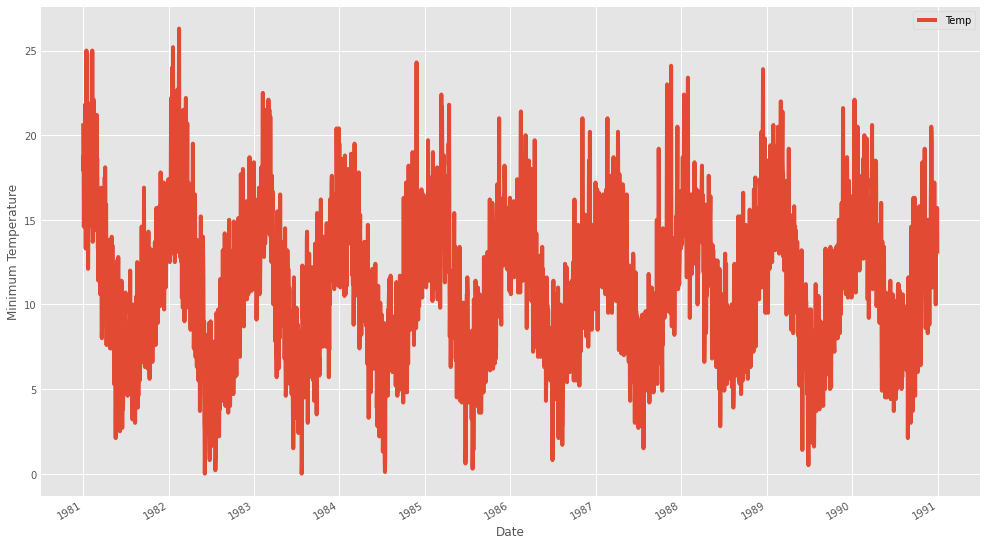

In [293]:
ax = series.plot()
# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

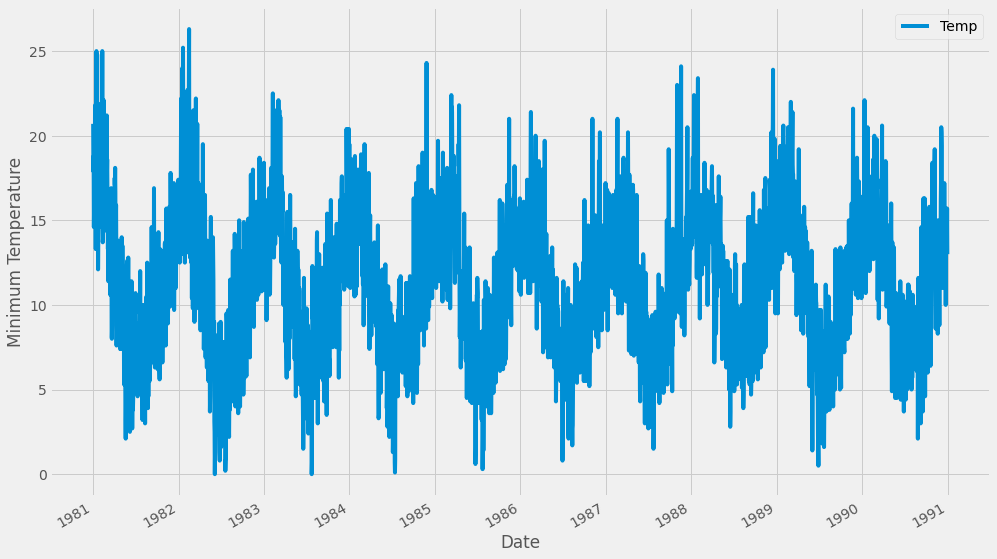

In [294]:
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')
ax = series.plot()
# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

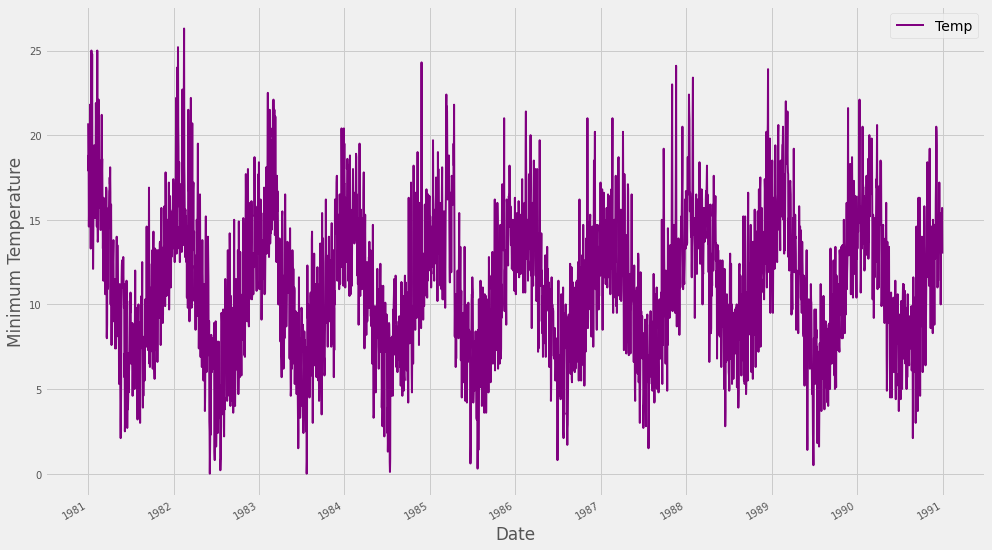

In [295]:
# Plot a line plot using the specified arguments
ax = series.plot(color='purple', figsize=(15, 10), linewidth=2, fontsize=10)
# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

In [296]:
plt.style.use('ggplot')

## Subset time series data

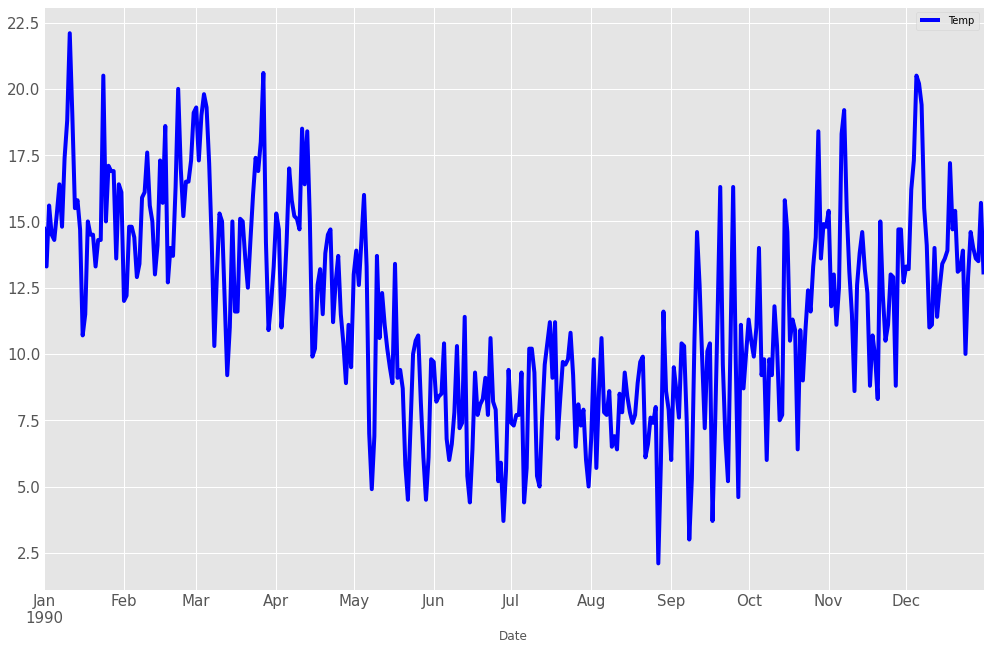

In [297]:
# Select the subset of data between 1990 and 2000
subset_1 = series['1990':'2000']

# Plot the time series in your DataFrame as a blue area chart
ax = subset_1.plot(color='blue', fontsize=15);

## Add vertical and horizontal markers

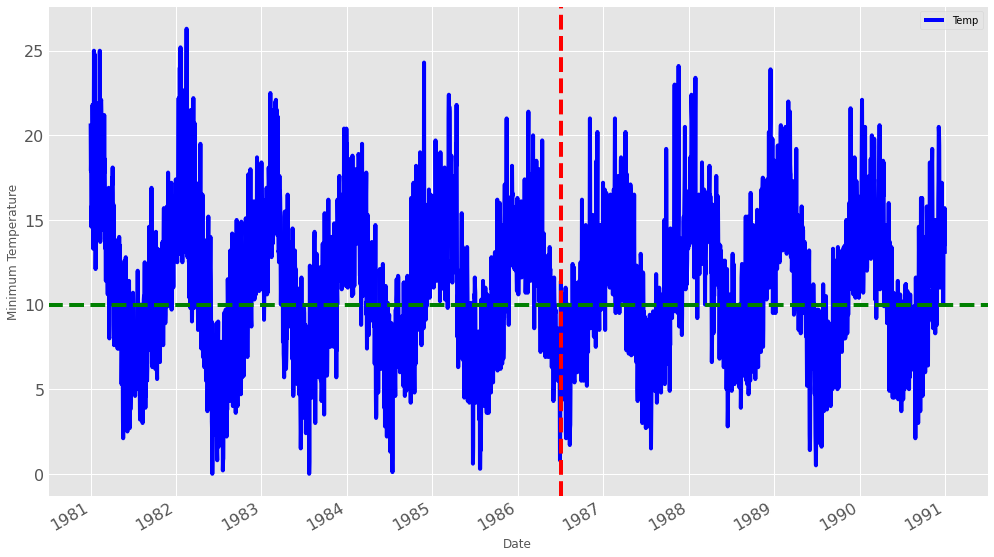

In [298]:
# Plot your time series
ax = series.plot(color='blue', fontsize=16)

# Add a red vertical line
ax.axvline('1986-07-05', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(10, color='green', linestyle='--')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()


## Add shaded regions to your plot

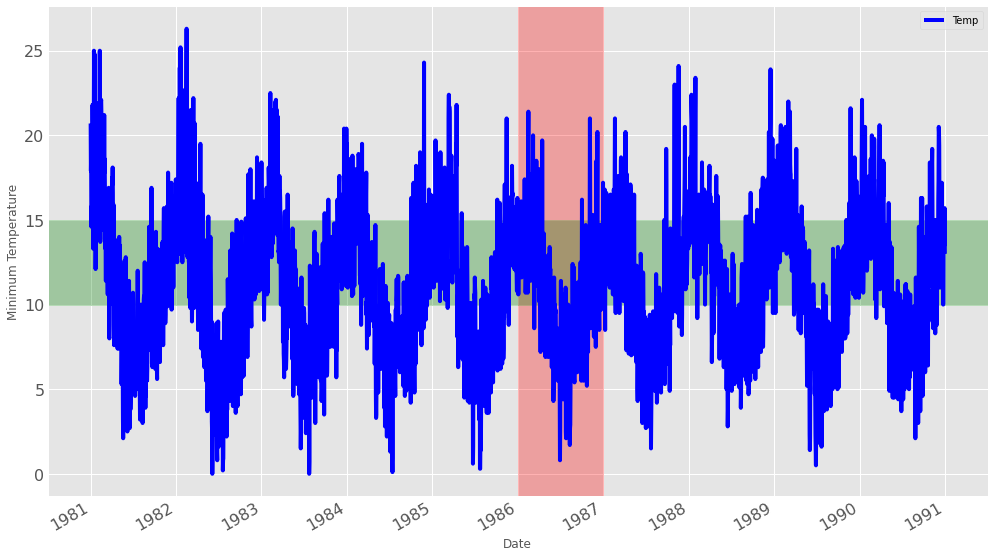

In [299]:
# Plot your time series
ax = series.plot(color='blue', fontsize=16)

# Add a vertical red shaded region
ax.axvspan('1986-01-01', '1987-01-01', color='red', alpha=.3)

# Add a horizontal green shaded region
ax.axhspan(10,15, color='green', alpha=.3);

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

## Plotting a series as multiple subplots

In [300]:
from pandas import Grouper

groups = series.squeeze().groupby(Grouper(freq='A'))
years = pd.DataFrame()

In [301]:
groups.groups

{Timestamp('1981-12-31 00:00:00', freq='A-DEC'): 365,
 Timestamp('1982-12-31 00:00:00', freq='A-DEC'): 730,
 Timestamp('1983-12-31 00:00:00', freq='A-DEC'): 1095,
 Timestamp('1984-12-31 00:00:00', freq='A-DEC'): 1460,
 Timestamp('1985-12-31 00:00:00', freq='A-DEC'): 1825,
 Timestamp('1986-12-31 00:00:00', freq='A-DEC'): 2190,
 Timestamp('1987-12-31 00:00:00', freq='A-DEC'): 2555,
 Timestamp('1988-12-31 00:00:00', freq='A-DEC'): 2920,
 Timestamp('1989-12-31 00:00:00', freq='A-DEC'): 3285,
 Timestamp('1990-12-31 00:00:00', freq='A-DEC'): 3650}

In [302]:
for name, group in groups:
    years[name.year] = group.values

In [303]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


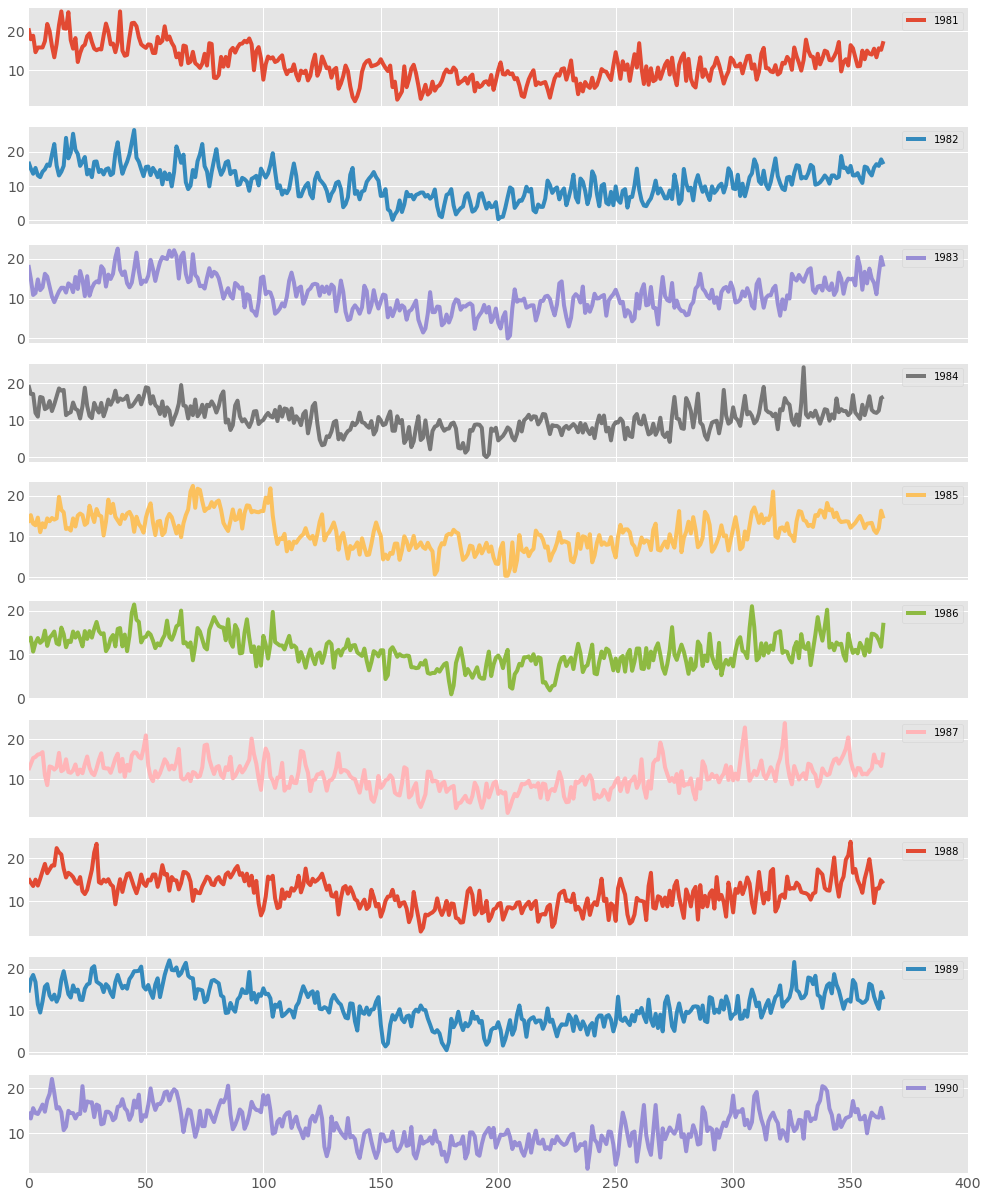

In [304]:
years.plot(subplots=True, legend=True, figsize= (15,20), xlim= (0,400), fontsize= 14)
pyplot.show()

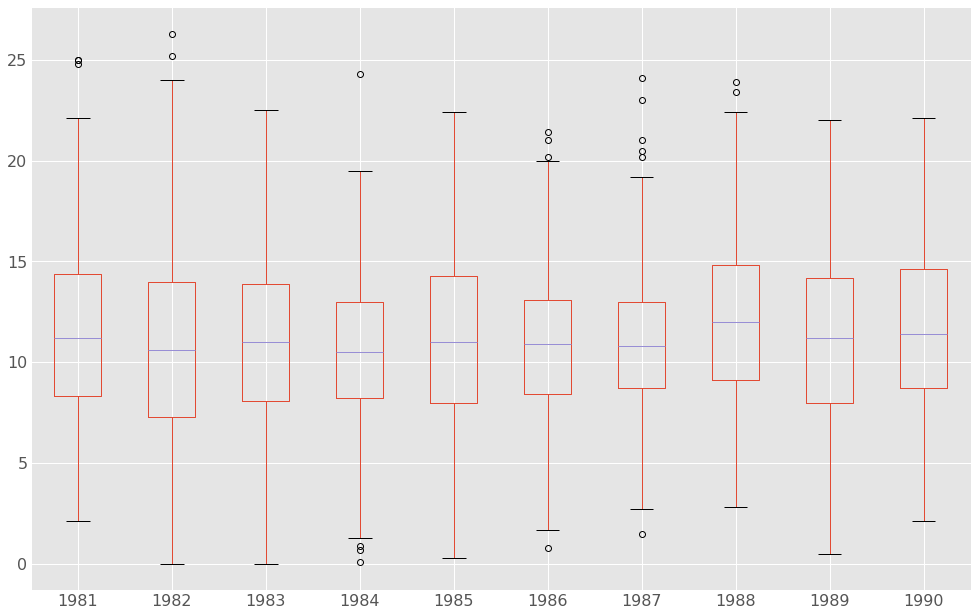

In [305]:
years.boxplot( fontsize= 16)
pyplot.show()

## Visualize multiple time series
Let's work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012

In [306]:
# Read in meat DataFrame
meat = pd.read_csv('ch4_meat.csv')

In [307]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             827 non-null    object 
 1   beef             827 non-null    float64
 2   veal             827 non-null    float64
 3   pork             827 non-null    float64
 4   lamb_and_mutton  827 non-null    float64
 5   broilers         635 non-null    float64
 6   other_chicken    143 non-null    float64
 7   turkey           635 non-null    float64
dtypes: float64(7), object(1)
memory usage: 51.8+ KB


In [308]:
# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame 
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
meat.describe()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


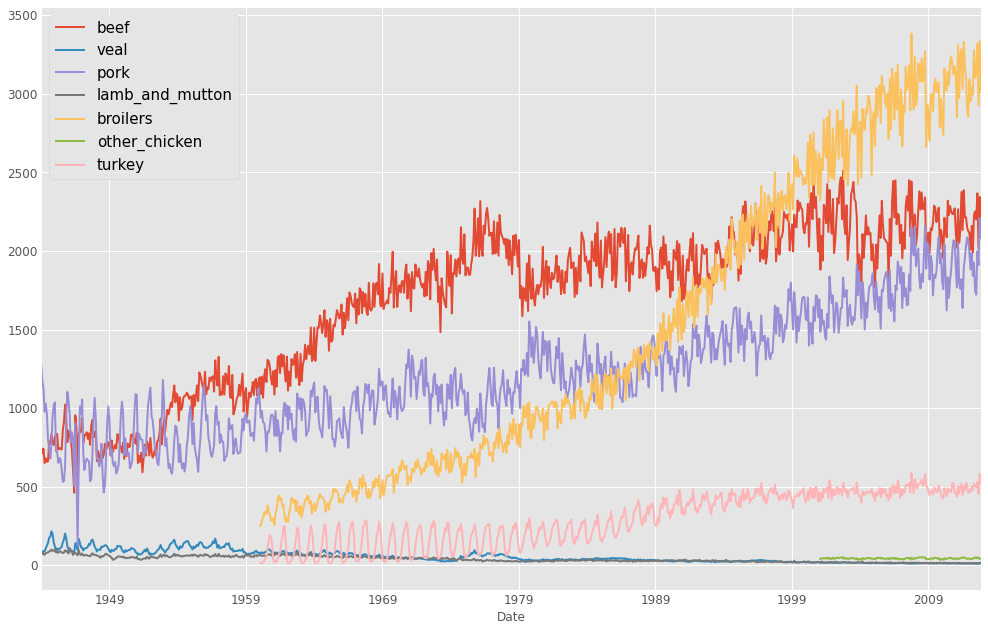

In [309]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

### Discussion: 
How should we take care of missing values in timeseries

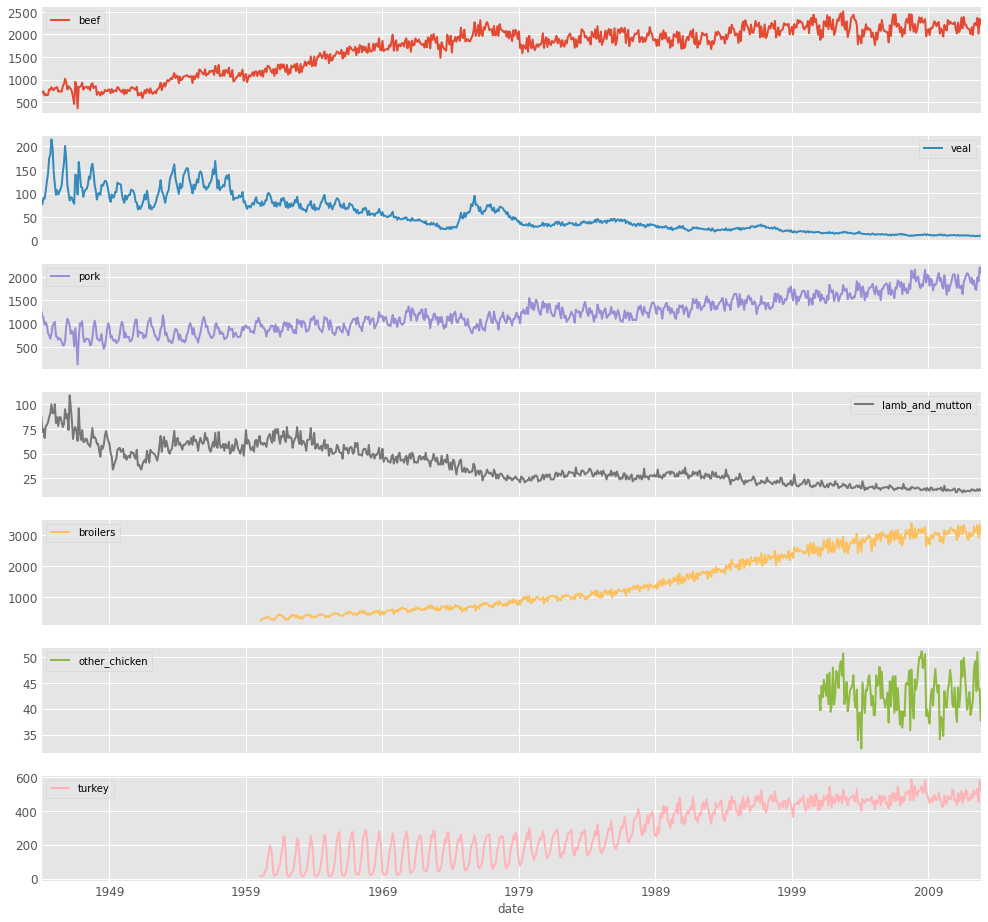

In [310]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,15), subplots= True)

# Show plot
plt.show()

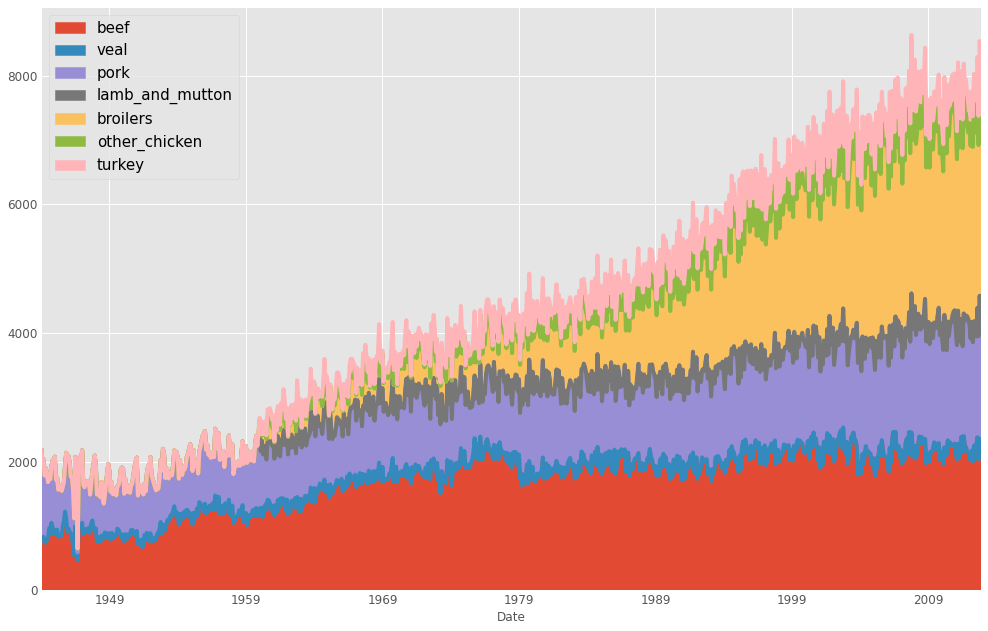

In [311]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

### Discussion:
What is wrong with above plot?

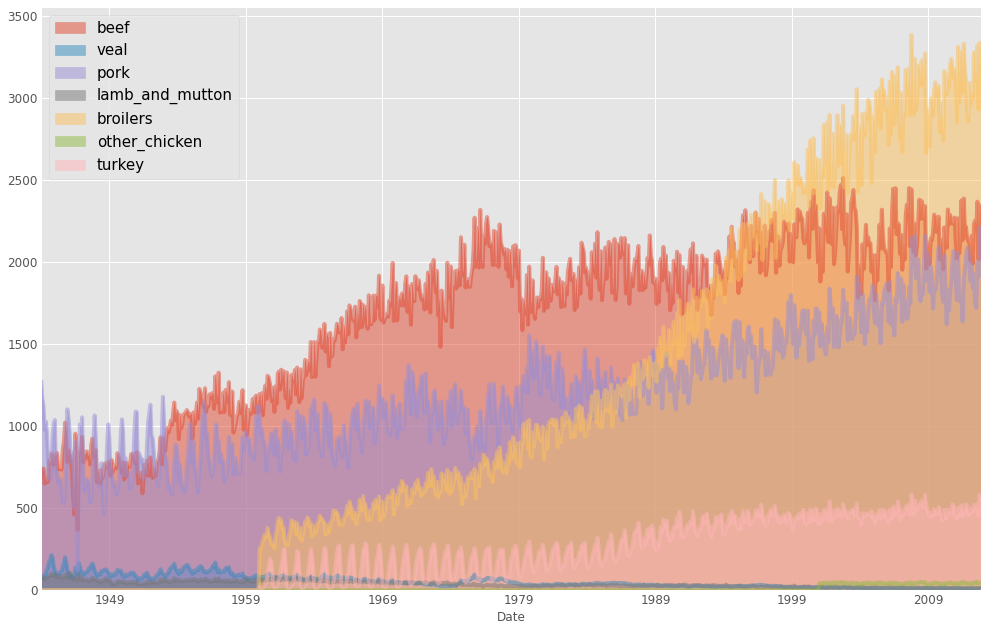

In [312]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10), stacked= False, alpha= 0.5)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

## Display rolling averages (Moving Average)

A moving average, also known as rolling mean, is a commonly used technique in the field of time series analysis. It can be used to smooth out short-term fluctuations, remove outliers, and highlight long-term trends or cycles. Taking the rolling mean of your time series is equivalent to “smoothing” your time series data. In pandas, the .rolling() method allows you to specify the number of data points to use when computing your metrics.

Let's revisit the lineplot

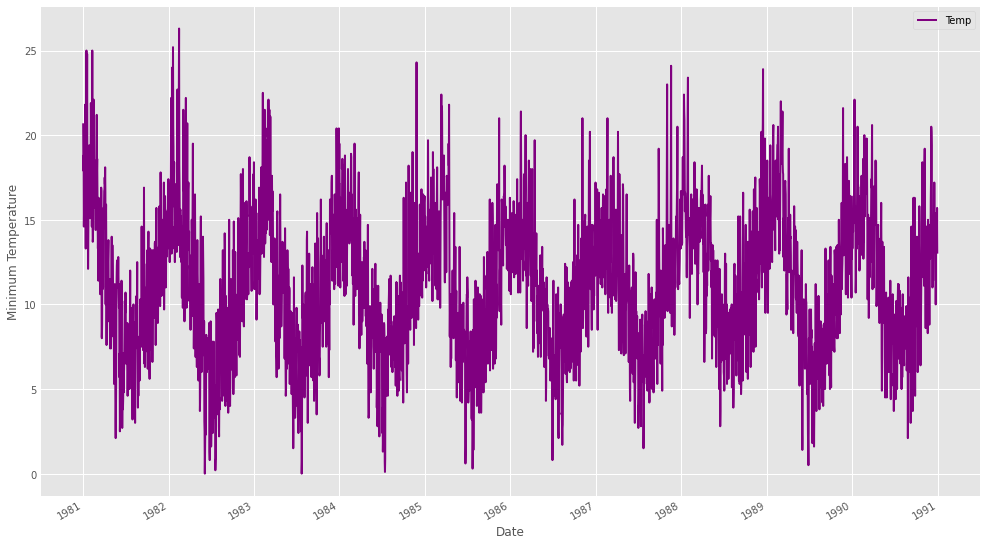

In [313]:
# Plot a line plot using the specified arguments
ax = series.plot(color='purple', figsize=(15, 10), linewidth=2, fontsize=10)
# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Minimum Temperature');
plt.show()

In [314]:
# Compute the weekly rolling mean 
ma = series.rolling(window=7).mean()
# Compute the weekly rolling standard deviation 
mstd = series.rolling(window=7).std()

In [315]:
ma.head(10)

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,NaN
1981-01-05,NaN
1981-01-06,NaN
1981-01-07,17.057143
1981-01-08,16.585714
1981-01-09,17.142857


In [316]:
mstd.head (10)

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,NaN
1981-01-05,NaN
1981-01-06,NaN
1981-01-07,2.152407
1981-01-08,1.476966
1981-01-09,2.462287


In [317]:
# Compute the weekly rolling mean 
ma = series.rolling(window=7).mean()

# Compute the weekly rolling standard deviation 
mstd = series.rolling(window=7).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma ['Temp'] + (mstd ['Temp'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma ['Temp'] - (mstd ['Temp'] * 2)

In [318]:
ma.head(20)

,Temp,upper,lower
Date,,,
1981-01-01,NaN,NaN,NaN
1981-01-02,NaN,NaN,NaN
1981-01-03,NaN,NaN,NaN
1981-01-04,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN
1981-01-06,NaN,NaN,NaN
1981-01-07,17.057143,21.361957,12.752328
1981-01-08,16.585714,19.539646,13.631782
1981-01-09,17.142857,22.067431,12.218283


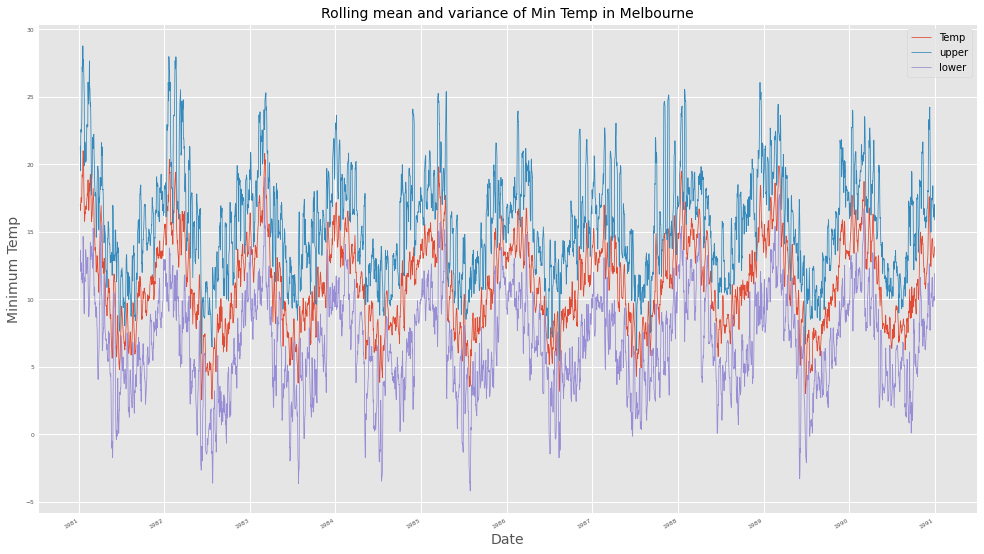

In [319]:

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Minimum Temp', fontsize=14)
ax.set_title('Rolling mean and variance of Min Temp in Melbourne', fontsize=14)
plt.show();

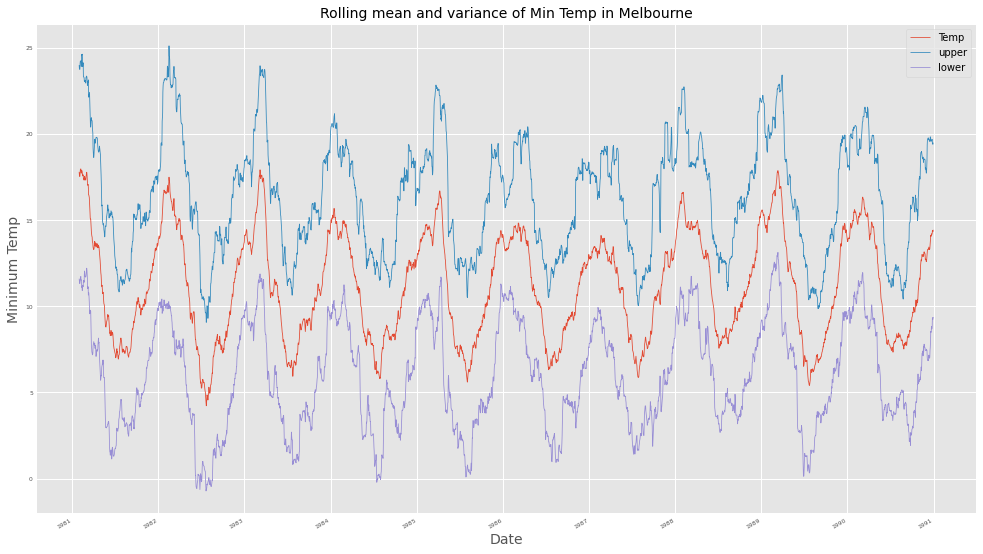

In [320]:
# Compute the weekly rolling mean 
ma = series.rolling(window=30).mean()

# Compute the weekly rolling standard deviation 
mstd = series.rolling(window=30).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma ['Temp'] + (mstd ['Temp'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma ['Temp'] - (mstd ['Temp'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Minimum Temp', fontsize=14)
ax.set_title('Rolling mean and variance of Min Temp in Melbourne', fontsize=14)
plt.show();

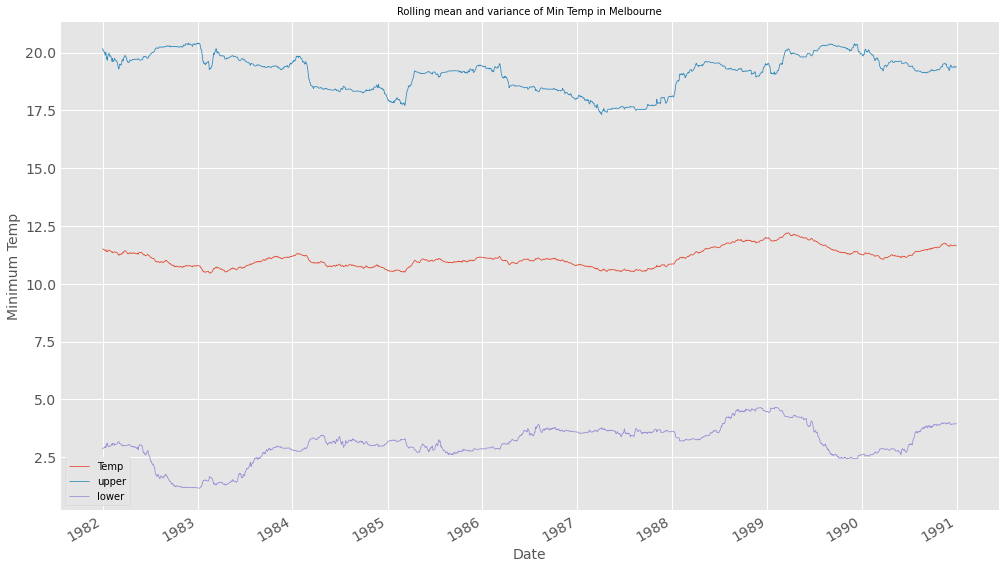

In [321]:
# Compute the weekly rolling mean 
ma = series.rolling(window=365).mean()

# Compute the weekly rolling standard deviation 
mstd = series.rolling(window=365).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma ['Temp'] + (mstd ['Temp'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma ['Temp'] - (mstd ['Temp'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=14)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Minimum Temp', fontsize=14)
ax.set_title('Rolling mean and variance of Min Temp in Melbourne', fontsize=10)
plt.show();

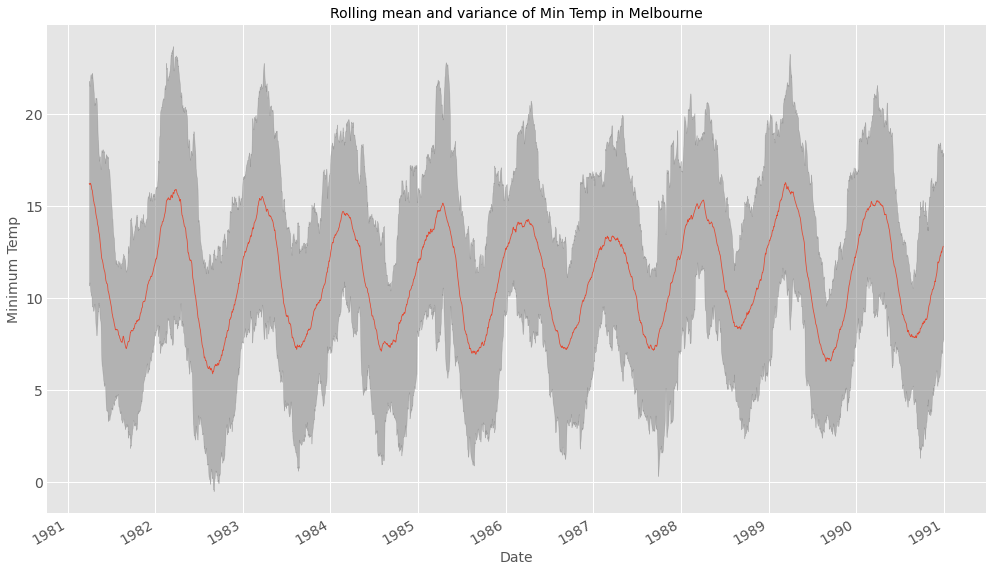

In [322]:
# Compute the weekly rolling mean 
ma = series.rolling(window=90).mean()

# Compute the weekly rolling standard deviation 
mstd = series.rolling(window=30).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma ['Temp'] + (mstd ['Temp'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma ['Temp'] - (mstd ['Temp'] * 2)

# Plot the content of the ma DataFrame
ax = ma.Temp.plot(linewidth=0.8, fontsize=14)
ax.fill_between( ma.index, ma['lower'], ma['upper'], alpha=.5, color= 'gray')
# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Minimum Temp', fontsize=14)
ax.set_title('Rolling mean and variance of Min Temp in Melbourne', fontsize=14)
plt.show();


## Display aggregated values

Another useful technique to visualize time series data is to take aggregates of the values in your data.
Aggregating values in a time series can help answer questions such as “what is the mean value of our time series on Sundays”, or “what is the mean value of our time series during each month of the year”. If the index of your pandas DataFrame consists of DateTime types, then you can extract the indices and group your data by these values. Here, you use the .groupby() and .mean() methods to compute the monthly and yearly averages

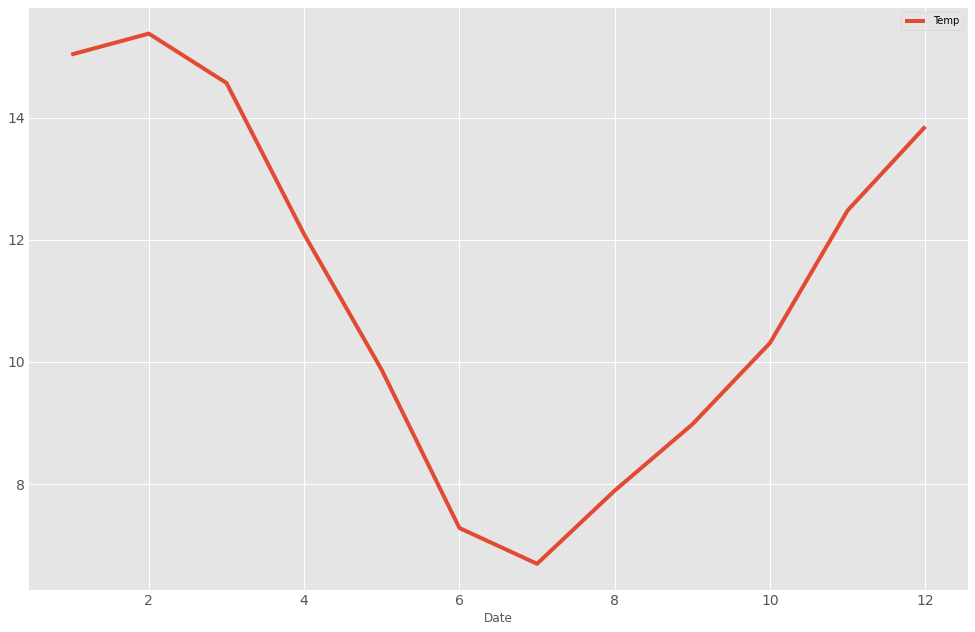

In [323]:
# Get month for each dates in the index 
index_month = series.index.month

# Compute the mean for each month of the year
mean_temp_by_month = series.groupby(index_month).mean()

# Plot the mean temperature for each month of the year
mean_temp_by_month.plot(fontsize=14)

# Specify the fontsize on the legend
# Specify labels, legend, and show the plot
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Mean Minimum Temp', fontsize=14);

## Histograms

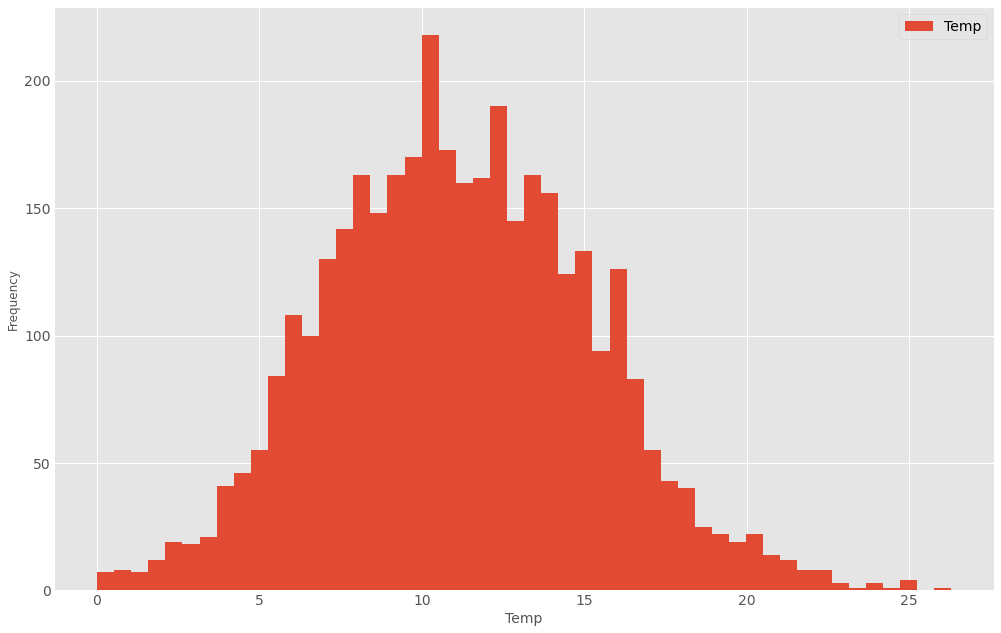

In [324]:
# Generate a histogram
ax = series.plot(kind='hist', bins=50, fontsize=14)

# Set the labels and display the plot
ax.set_xlabel('Temp', fontsize=14)
plt.legend(fontsize=14)
plt.show();

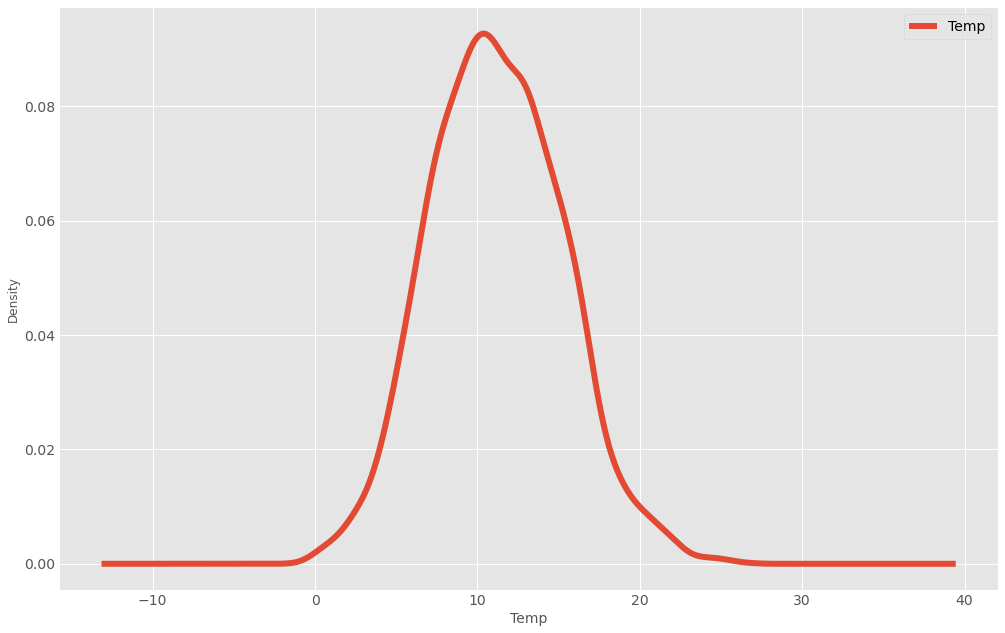

In [325]:
# Generate a histogram
ax = series.plot(kind='density', linewidth=6, fontsize=14)

# Set the labels and display the plot
ax.set_xlabel('Temp', fontsize=14)
plt.legend(fontsize=14)
plt.show();

## Time Series Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.

Like the box plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

For convenience, the matrix is rotation (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

In [326]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


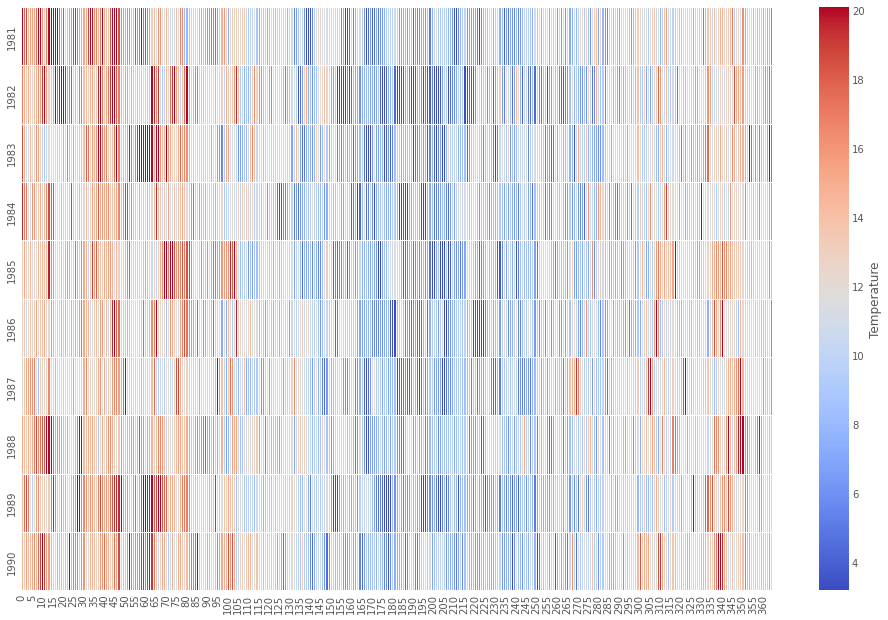

In [327]:
import seaborn as sns
ax = sns.heatmap(years.T, cmap='coolwarm', robust=True, 
                  linewidths=0.5, 
                 cbar_kws={'shrink':1, 'label':'Temperature'})


### Practice: 
Try to modify the above plot to reflect the monthly average values instead of daily ones

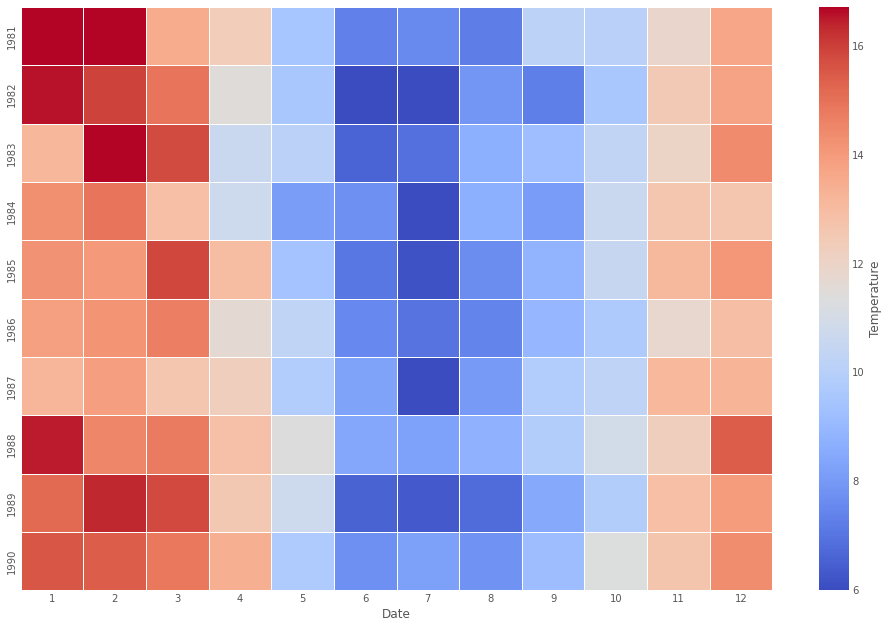

In [333]:
yearlist = sorted(list(set(series.index.year)))
monthly_average= pd.DataFrame()
for y in yearlist:
    year_series = series[series.index.year==y]
    monthly_average[y]=(year_series.groupby(year_series.index.month).mean())
ax = sns.heatmap(monthly_average.T, cmap='coolwarm', robust=True, 
                  linewidths=0.5, 
                 cbar_kws={'shrink':1, 'label':'Temperature'})    

## Autocorrelation in time series data

### Lag plot

**Time series modeling assumes a relationship between an observation and the previous observation.**

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

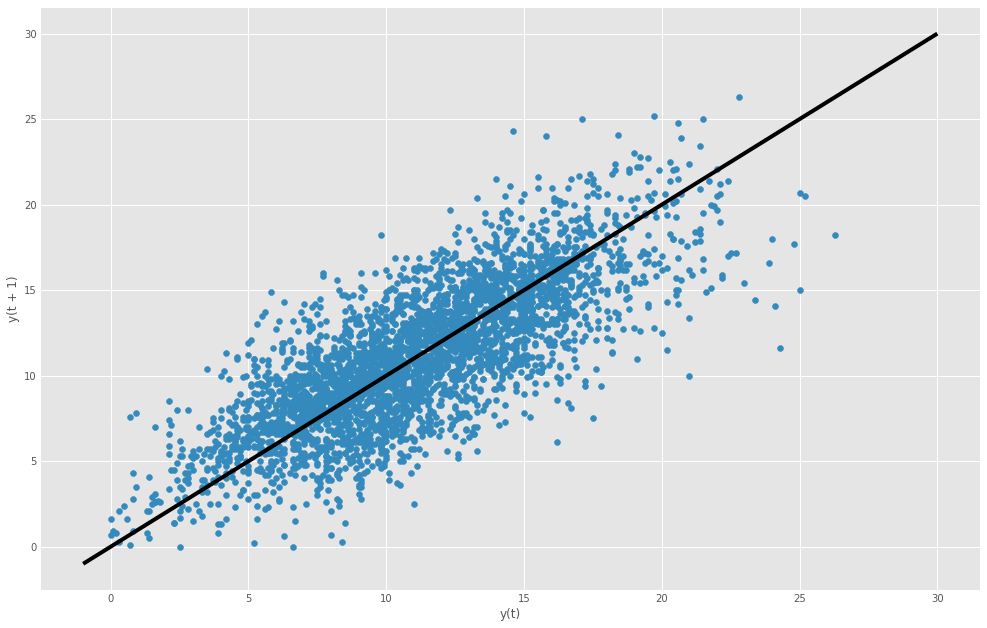

In [339]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.plot([-1,30],[-1,30], color='Black')
plt.show()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.

For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the Minimum Daily Temperatures dataset.

First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value.

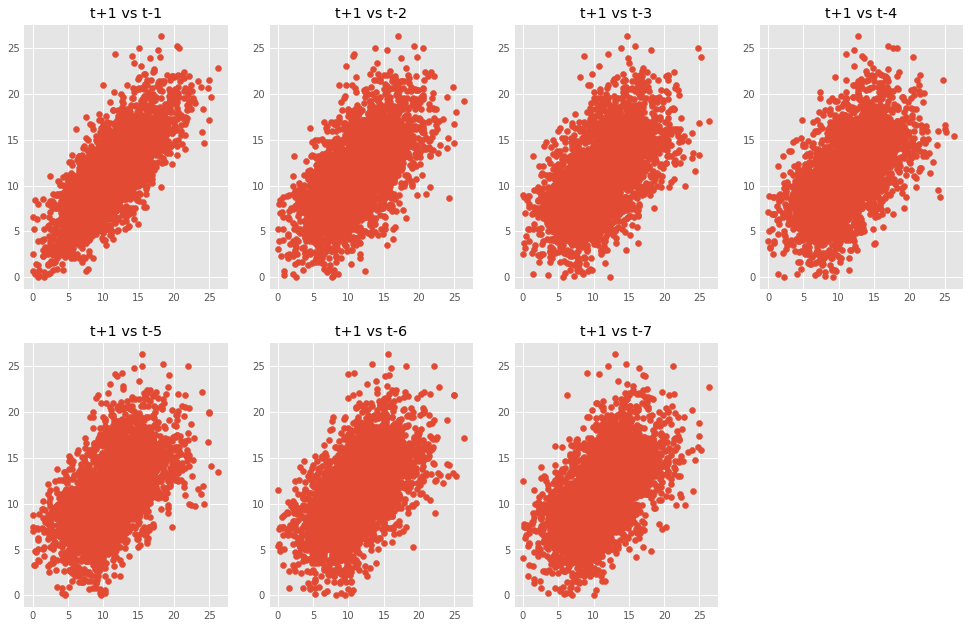

In [343]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called **autocorrelation (self-correlation)**.

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.



A plot of the autocorrelation of a time series by lag is called the **AutoCorrelation Function**, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset:

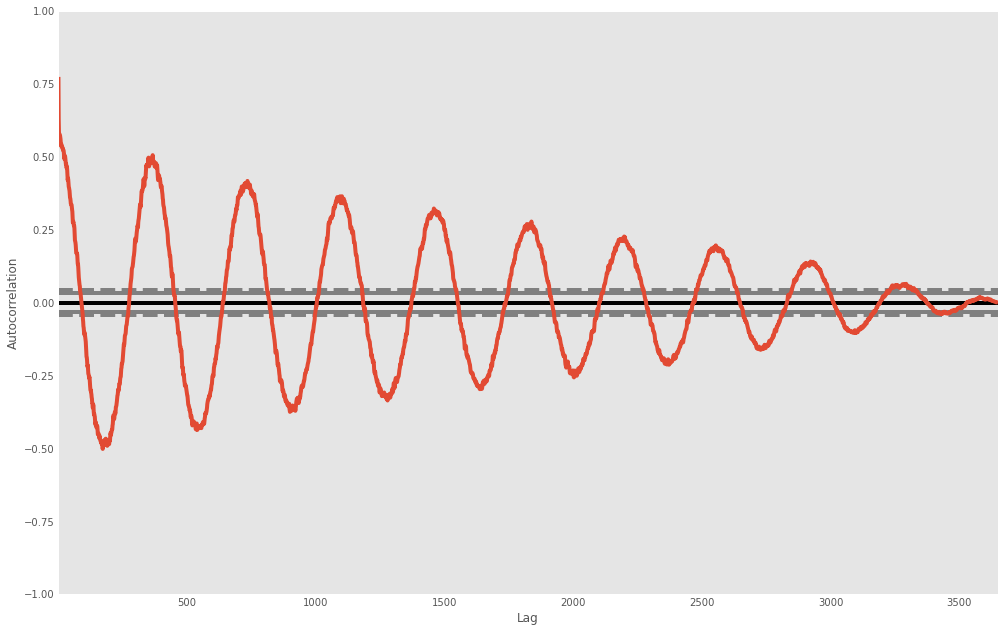

In [350]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

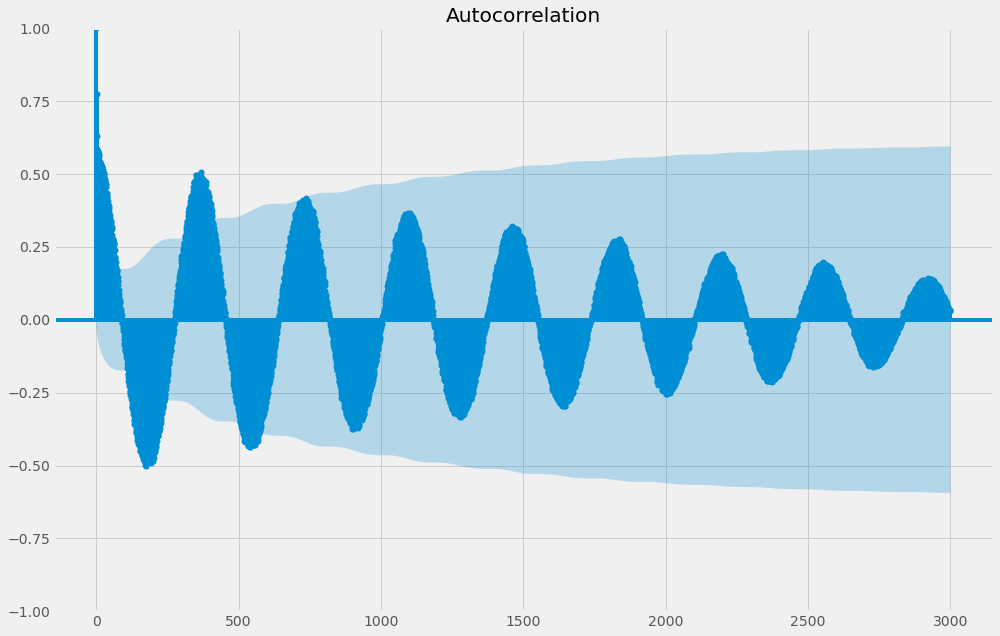

In [352]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf
plt.style.use('fivethirtyeight')
plot_acf(series, lags= 3000)
pyplot.show()

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

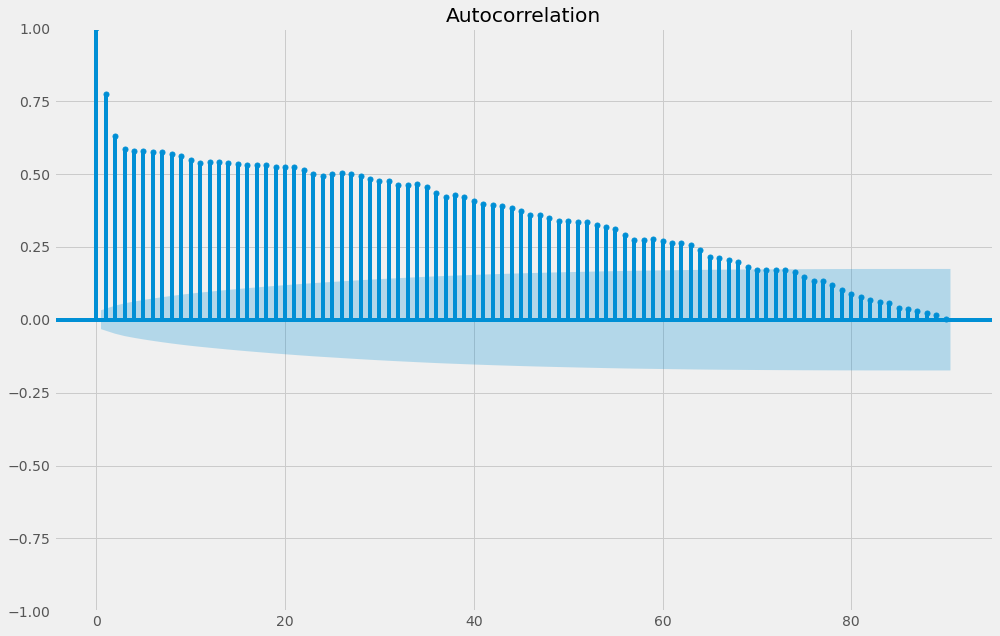

In [353]:
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(series['Temp'], lags=90)

# Show plot
plt.show();

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.


### Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

**The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.**

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.



/Users/nn2tf/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


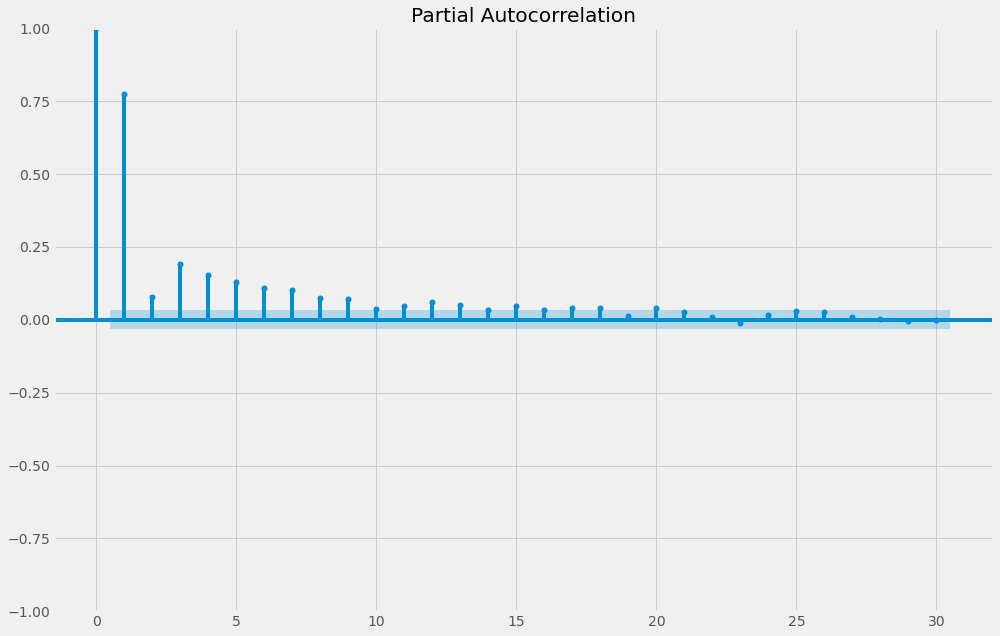

In [356]:
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
tsaplots.plot_pacf(series['Temp'], lags=30)

# Show plot
plt.show();

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

## Practice: 
In meat dataset, PLot and compare ACF and PCAF for Beef and lamb

In [357]:
# Read in meat DataFrame
meat = pd.read_csv('ch4_meat.csv', parse_dates= True, index_col= 'date')